In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
#set up the google colab

Found GPU at: /device:GPU:0


![alt text](https://www.cio.co.ke/wp-content/uploads/2018/03/Google-Drive.jpg)


In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
googlepath = '/content/drive/My Drive/ADM/Assignment 1'

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
print(os.listdir())

['.config', 'drive', 'sample_data']


In [0]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# KEY_SKU.csv has 1178 rows in reality, but we are only loading/previewing the first 1000 rows
Key_code = pd.read_csv(googlepath + '/KEY_SKU.csv', delimiter=',', nrows = nRowsRead)
Key_code.dataframeName = 'KEY_SKU.csv'
nRow, nCol = Key_code.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 2 columns


In [0]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [0]:
Marketing_Spends = pd.read_csv(googlepath+'/Marketing_Spend.csv', delimiter=',')
Marketing_Spends.dataframeName = 'Marketing_Spend.csv'
nRow, nCol = Marketing_Spends.shape
print(f'There are {nRow} rows and {nCol} columns')
Marketing_Spends

There are 365 rows and 3 columns


,Unnamed: 0,Offline Spend,Online Spend
0,2017-01-01,4500,2424.50
1,2017-01-02,4500,3480.36
2,2017-01-03,4500,1576.38
3,2017-01-04,4500,2928.55
4,2017-01-05,4500,4055.30
...,...,...,...
360,2017-12-27,4000,3396.87
361,2017-12-28,4000,3246.84
362,2017-12-29,4000,2546.58
363,2017-12-30,4000,674.31


In [0]:
Online = pd.read_csv(googlepath+'/Online.csv', delimiter=',')
Online.dataframeName = 'Online.csv'
nRow, nCol = Online.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 54144 rows and 11 columns


In [0]:
Online.columns

Index(['CustomerID', 'Transaction ID', 'Date', 'Product SKU', 'Product',
       'Product Category (Enhanced E-commerce)', 'Quantity', 'Avg. Price',
       'Revenue', 'Tax', 'Delivery'],
      dtype='object')

In [0]:
missing_percentage = Online.isnull().sum() / Online.shape[0] * 100
missing_percentage

CustomerID                                0.000000
Transaction ID                            0.000000
Date                                      0.000000
Product SKU                               0.000000
Product                                   0.000000
Product Category (Enhanced E-commerce)    2.245863
Quantity                                  0.009235
Avg. Price                                0.000000
Revenue                                   0.000000
Tax                                       0.000000
Delivery                                  0.000000
dtype: float64

In [0]:
missing_percentage = Key_code.isnull().sum() / Key_code.shape[0] * 100
missing_percentage

Product SKU    0.0
StockCode      0.0
dtype: float64

In [0]:
missing_percentage = Marketing_Spends.isnull().sum() / Marketing_Spends.shape[0] * 100
missing_percentage

Unnamed: 0       0.0
Offline Spend    0.0
Online Spend     0.0
dtype: float64

In [0]:
Online[Online['Product Category (Enhanced E-commerce)'].isnull()]

,CustomerID,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
300,13448,48244,20171227,GGOEGAMC088199,Google Cappy Bib Blue,NaN,2.0,11.41,166.35,14.27,6.5
2384,15955,46729,20171213,GGOEGCBC074299,Google Device Stand,NaN,4.0,5.09,339.61,0.00,6.0
2640,17287,46559,20171212,GGOEGCBC074299,Google Device Stand,NaN,1.0,4.07,26.36,2.33,6.5
2978,17976,46306,20171210,GGOEGCBC074299,Google Device Stand,NaN,3.0,5.09,118.57,10.27,6.0
2983,17976,46305,20171210,GGOEGEHQ071199,"Google High Capacity 10,400mAh Charger",NaN,1.0,48.10,79.90,0.00,6.5
...,...,...,...,...,...,...,...,...,...,...,...
54080,16265,16704,20170101,GGOEGEFR024199,Metal Earbuds with Small Zipper Case,NaN,10.0,11.34,992.52,0.00,6.5
54081,16265,16704,20170101,GGOEGEVA022399,Micro Wireless Earbud,NaN,2.0,41.26,992.52,0.00,6.5
54131,16553,16682,20170101,GGOEGCBC074299,Google Device Stand,NaN,31.0,4.98,954.95,57.75,6.5
54135,16037,16682,20170101,GGOEGEVA022399,Micro Wireless Earbud,NaN,2.0,41.26,954.95,57.75,6.5


In [0]:
Online[Online['Quantity'].isnull()]

,CustomerID,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
23026,15789,34439,20170802,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,NaN,1.39,9925.11,0.0,6.0
23060,16560,34429,20170802,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,NaN,1.39,18976.72,0.0,6.0
41574,17858,24860,20170405,GGOEGGOA017399,Maze Pen,Office,NaN,0.99,23945.56,0.0,6.5
41579,18283,24860,20170405,GGOEYFKQ020699,YouTube Custom Decals,Office,NaN,1.99,23945.56,0.0,6.5
48422,15602,20374,20170214,GGOEGODR017799,Recycled Mouse Pad,NaN,NaN,1.50,17855.50,0.0,6.5


In [0]:
Online.isnull().sum().sum()

1221

Dropping the rows with missing values 

In [0]:
Online = Online.loc[(Online['Product Category (Enhanced E-commerce)'].isnull()==False) & (Online['Quantity'].isnull()==False)].copy()

In [0]:
Online.isnull().sum().sum()

0

In [0]:
Online['Date']=pd.to_datetime(Online['Date'], format='%Y%m%d', errors='ignore')
Online

,CustomerID,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
0,17850,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99
1,17850,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50
2,17850,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50
3,17850,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50
4,17850,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50
...,...,...,...,...,...,...,...,...,...,...,...
54139,16037,16682,2017-01-01,GGOEGOXQ016399,Badge Holder,Office,31.0,1.99,954.95,57.75,6.50
54140,16037,16682,2017-01-01,GGOEYAAB031816,YouTube Men's Short Sleeve Hero Tee Black,Apparel,5.0,17.53,954.95,57.75,6.50
54141,16037,16681,2017-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1.0,2.05,1.99,0.60,6.50
54142,16037,16680,2017-01-01,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,Nest-USA,1.0,153.71,149.00,13.22,6.50


In [0]:
Online.to_csv('Online_Sales.csv')
!cp Online_Sales.csv '/content/drive/My Drive/ADM/Assignment 1'

In [0]:
Online_Keycode = pd.merge(Online, Key_code, how='inner', on = 'Product SKU')

In [0]:
Online_Keycode.columns

Index(['CustomerID', 'Transaction ID', 'Date', 'Product SKU', 'Product',
       'Product Category (Enhanced E-commerce)', 'Quantity', 'Avg. Price',
       'Revenue', 'Tax', 'Delivery', 'StockCode'],
      dtype='object')

In [0]:
Online_Keycode.isnull().sum().sum()

0

Let's count the quantity of each products sold in one year

In [0]:
most_common_products_sold = Online['Product'].value_counts().sort_values(ascending=False)
most_common_products_sold.to_frame()

,Product
Nest® Learning Thermostat 3rd Gen-USA - Stainless Steel,3511
Nest® Cam Outdoor Security Camera - USA,3328
Nest® Cam Indoor Security Camera - USA,3230
Google Sunglasses,1523
Nest® Protect Smoke + CO White Battery Alarm-USA,1361
...,...
Google Cappy Bib Blue,1
Digital Lightshow Smart Speaker and Notification Center,1
Compact Journal with Recycled Pages,1
Android Women's Short Sleeve Hero Tee Black,1


Here we see product with Nest® Learning Thermostat 3rd Gen-USA - Stainless Steel was bought most frequently. But was it also the product bought in highest quantity.Let's now considering the quanity too.

In [0]:
most_sold_product=Online_Keycode.groupby("Product")['Quantity'].sum().sort_values(ascending=False)
most_sold_product.to_frame()


,Quantity
Product,
Maze Pen,16234.0
Google 22 oz Water Bottle,14282.0
Google Sunglasses,11452.0
Sport Bag,7321.0
Google Metallic Notebook Set,6496.0
...,...
Google White Force 17 oz Bottle,3.0
Google Tee Red,3.0
YouTube Men's 3/4 Sleeve Henley,2.0


We know try to visualize this count using bar graph

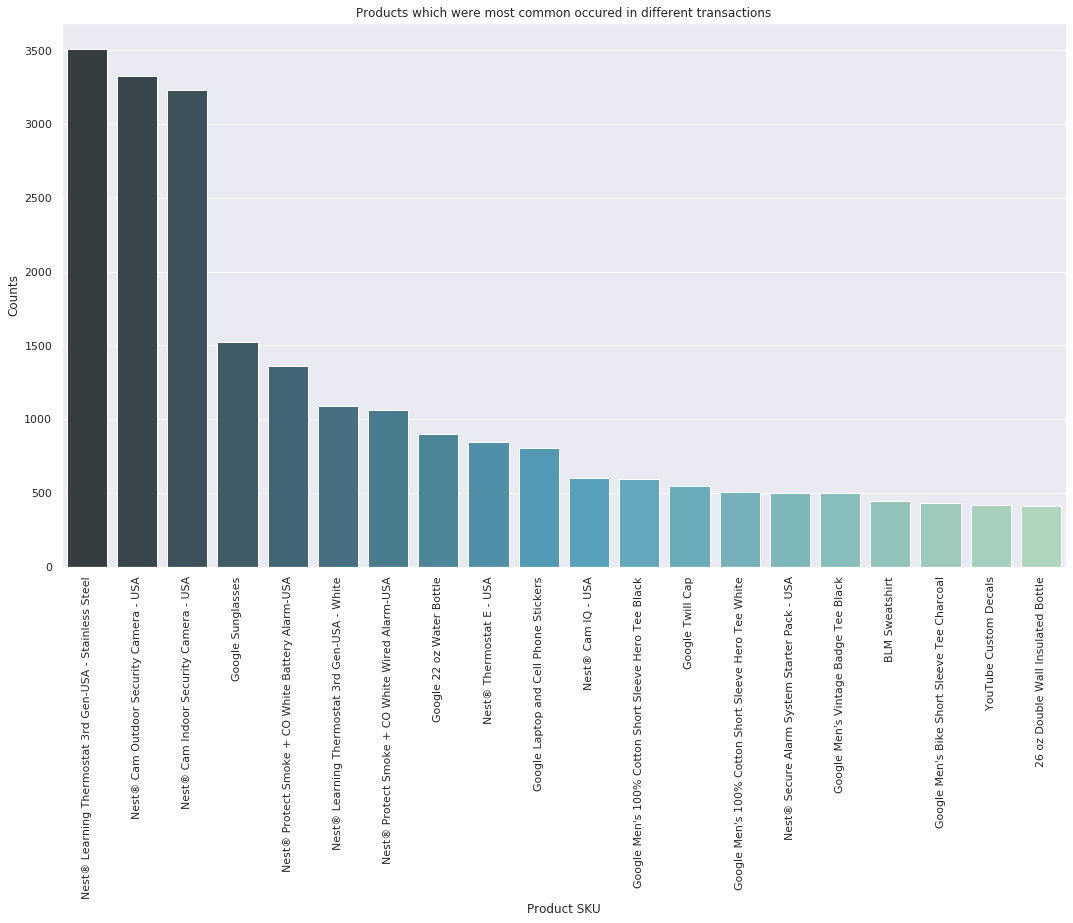

In [0]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
sns.barplot(most_common_products_sold.iloc[0:20].index,
            most_common_products_sold.iloc[0:20].values,
            ax = ax, palette="GnBu_d")
ax.set_ylabel("Counts")
ax.set_xlabel("Product SKU")
ax.set_title("Products which were most common occured in different transactions");
plt.xticks(rotation=90);

In [0]:
Online_Keycode['Product SKU'].nunique()

968

We have 968 different products , lets find out in how many categories these products are divided into

In [0]:
Online_Keycode['Product Category (Enhanced E-commerce)'].nunique()

20

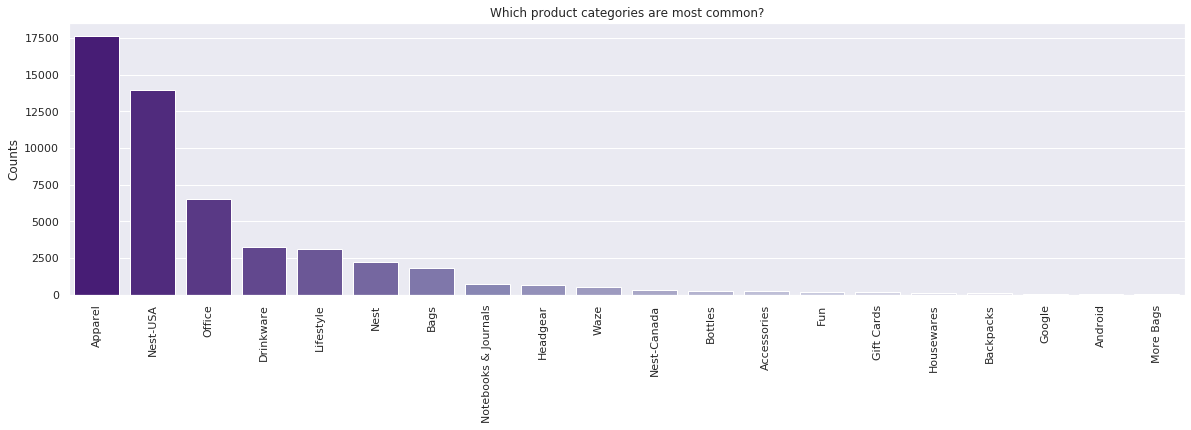

In [0]:
category_count = Online_Keycode['Product Category (Enhanced E-commerce)'].value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(category_count.index, category_count.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product categories are most common?");
plt.xticks(rotation=90);

In [0]:
category_count

Apparel                 17639
Nest-USA                13977
Office                   6513
Drinkware                3223
Lifestyle                3080
Nest                     2198
Bags                     1800
Notebooks & Journals      749
Headgear                  665
Waze                      553
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Backpacks                  89
Google                     64
Android                    43
More Bags                  29
Name: Product Category (Enhanced E-commerce), dtype: int64

In [0]:
Online_Keycode.groupby("Product Category (Enhanced E-commerce)")['Product SKU'].nunique().sort_values(ascending=False).iloc[0:10]


Product Category (Enhanced E-commerce)
Apparel                 765
Office                   44
Drinkware                25
Waze                     22
Lifestyle                21
Bags                     15
Notebooks & Journals     14
Headgear                 13
Nest                      8
Accessories               7
Name: Product SKU, dtype: int64

We can see that several different products lie under same Product category . We can also observe that Apparel category has most variety of products.

In [0]:
Online_Keycode.loc[Online_Keycode['Product Category (Enhanced E-commerce)'] == "Apparel"]['Product'].value_counts()

Google Men's 100% Cotton Short Sleeve Hero Tee Black    595
Google Twill Cap                                        546
Google Men's 100% Cotton Short Sleeve Hero Tee White    504
Google Men's Vintage Badge Tee Black                    496
BLM Sweatshirt                                          445
                                                       ... 
Android 5-Panel Low Cap                                   3
Google Toddler 1/4 Zip Fleece Pewter                      3
Google Tee Red                                            2
YouTube Men's 3/4 Sleeve Henley                           2
Google Women's Colorblock Tee White                       1
Name: Product, Length: 182, dtype: int64

In [0]:
Online_Keycode.Quantity.describe()


count    51882.000000
mean         4.501349
std         20.235930
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        900.000000
Name: Quantity, dtype: float64

In [0]:
Marketing_Spends.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
Marketing_Spends.dtypes

Date              object
Offline Spend      int64
Online Spend     float64
dtype: object

In [0]:
Marketing_Spends['Date']=pd.to_datetime(Marketing_Spends['Date'])

In [0]:
Marketing_Spends.dtypes

Date             datetime64[ns]
Offline Spend             int64
Online Spend            float64
dtype: object

In [0]:
d = Online.groupby(('Date'))
result = d['Quantity'].unique()

dict = result.to_dict() 

dict_r ={}
for i in dict : 
    dict_r.update( {i : sum(dict[i])} )

dict_r.keys()

index = ['Quantity']
Online_revenue=pd.DataFrame(dict_r,index=index)
y=Online_revenue.T
y['Date'] = y.index
y=y.reset_index()
y_q=y.drop('index',axis=1,inplace=False)
y_q


,Quantity,Date
0,149.0,2017-01-01
1,104.0,2017-01-02
2,249.0,2017-01-03
3,213.0,2017-01-04
4,1183.0,2017-01-05
...,...,...
360,91.0,2017-12-27
361,25.0,2017-12-28
362,15.0,2017-12-29
363,25.0,2017-12-30


In [0]:
d = Online.groupby(('Date'))
result = d['Avg. Price'].unique()

dict = result.to_dict() 

dict_r ={}
for i in dict : 
    #print(i, sum(dict[i]))
    dict_r.update( {i : sum(dict[i])} )

dict_r.keys()

index = ['Avg. Price']
Online_revenue=pd.DataFrame(dict_r,index=index)
y=Online_revenue.T
y['Date'] = y.index
y=y.reset_index()
y_avg=y.drop('index',axis=1,inplace=False)
y_avg


,Avg. Price,Date
0,1116.34,2017-01-01
1,1222.45,2017-01-02
2,1587.63,2017-01-03
3,1695.15,2017-01-04
4,1655.56,2017-01-05
...,...,...
360,1325.99,2017-12-27
361,1256.72,2017-12-28
362,1486.65,2017-12-29
363,1314.52,2017-12-30


In [0]:
y_final =pd.merge(y_q, y_avg, how='inner', on = 'Date')
y_final

,Quantity,Date,Avg. Price
0,149.0,2017-01-01,1116.34
1,104.0,2017-01-02,1222.45
2,249.0,2017-01-03,1587.63
3,213.0,2017-01-04,1695.15
4,1183.0,2017-01-05,1655.56
...,...,...,...
360,91.0,2017-12-27,1325.99
361,25.0,2017-12-28,1256.72
362,15.0,2017-12-29,1486.65
363,25.0,2017-12-30,1314.52


In [0]:
d = Online.groupby(('Date'))
result = d['Tax'].unique()

dict = result.to_dict() 

dict_r ={}
for i in dict : 
    #print(i, sum(dict[i]))
    dict_r.update( {i : sum(dict[i])} )

dict_r.keys()

index = ['Tax']
Online_revenue=pd.DataFrame(dict_r,index=index)
y=Online_revenue.T
y['Date'] = y.index
y=y.reset_index()
y_tax=y.drop('index',axis=1,inplace=False)
y_tax


,Tax,Date
0,356.35,2017-01-01
1,786.42,2017-01-02
2,1255.11,2017-01-03
3,864.54,2017-01-04
4,1144.23,2017-01-05
...,...,...
360,832.05,2017-12-27
361,694.46,2017-12-28
362,699.64,2017-12-29
363,454.77,2017-12-30


In [0]:
y_final =pd.merge(y_final, y_tax, how='inner', on = 'Date')
y_final

,Quantity,Date,Avg. Price,Tax
0,149.0,2017-01-01,1116.34,356.35
1,104.0,2017-01-02,1222.45,786.42
2,249.0,2017-01-03,1587.63,1255.11
3,213.0,2017-01-04,1695.15,864.54
4,1183.0,2017-01-05,1655.56,1144.23
...,...,...,...,...
360,91.0,2017-12-27,1325.99,832.05
361,25.0,2017-12-28,1256.72,694.46
362,15.0,2017-12-29,1486.65,699.64
363,25.0,2017-12-30,1314.52,454.77


In [0]:
d = Online.groupby(('Date'))
result = d['Delivery'].unique()

dict = result.to_dict() 

dict_r ={}
for i in dict : 
    #print(i, sum(dict[i]))
    dict_r.update( {i : sum(dict[i])} )

dict_r.keys()

index = ['Delivery']
Online_revenue=pd.DataFrame(dict_r,index=index)
y=Online_revenue.T
y['Date'] = y.index
y=y.reset_index()
y_del=y.drop('index',axis=1,inplace=False)
y_del


,Delivery,Date
0,138.07,2017-01-01
1,53.16,2017-01-02
2,630.07,2017-01-03
3,132.12,2017-01-04
4,610.51,2017-01-05
...,...,...
360,45.48,2017-12-27
361,41.19,2017-12-28
362,54.18,2017-12-29
363,54.18,2017-12-30


In [0]:
y_final =pd.merge(y_final, y_del, how='inner', on = 'Date')
y_final

,Quantity,Date,Avg. Price,Tax,Delivery
0,149.0,2017-01-01,1116.34,356.35,138.07
1,104.0,2017-01-02,1222.45,786.42,53.16
2,249.0,2017-01-03,1587.63,1255.11,630.07
3,213.0,2017-01-04,1695.15,864.54,132.12
4,1183.0,2017-01-05,1655.56,1144.23,610.51
...,...,...,...,...,...
360,91.0,2017-12-27,1325.99,832.05,45.48
361,25.0,2017-12-28,1256.72,694.46,41.19
362,15.0,2017-12-29,1486.65,699.64,54.18
363,25.0,2017-12-30,1314.52,454.77,54.18


Now Lets calculate the total revenue in a particular day in Online sales

In [0]:
df = Online.groupby(('Date'))
result = df['Revenue'].unique()

dict = result.to_dict() 

dict_r ={}
for i in dict : 
    #print(i, sum(dict[i]))
    dict_r.update( {i : sum(dict[i])} )

dict_r.keys()

index = ['Revenue']
Online_revenue=pd.DataFrame(dict_r,index=index)
y=Online_revenue.T
y['Date'] = y.index
y=y.reset_index()
y_rev=y.drop('index',axis=1,inplace=False)
y_rev


,Revenue,Date
0,5112.21,2017-01-01
1,7831.19,2017-01-02
2,11076.02,2017-01-03
3,10049.54,2017-01-04
4,13404.21,2017-01-05
...,...,...
360,8334.89,2017-12-27
361,6845.49,2017-12-28
362,6974.16,2017-12-29
363,5169.61,2017-12-30


In [0]:
y_final =pd.merge(y_final, y_rev, how='inner', on = 'Date')
y_final

,Quantity,Date,Avg. Price,Tax,Delivery,Revenue
0,149.0,2017-01-01,1116.34,356.35,138.07,5112.21
1,104.0,2017-01-02,1222.45,786.42,53.16,7831.19
2,249.0,2017-01-03,1587.63,1255.11,630.07,11076.02
3,213.0,2017-01-04,1695.15,864.54,132.12,10049.54
4,1183.0,2017-01-05,1655.56,1144.23,610.51,13404.21
...,...,...,...,...,...,...
360,91.0,2017-12-27,1325.99,832.05,45.48,8334.89
361,25.0,2017-12-28,1256.72,694.46,41.19,6845.49
362,15.0,2017-12-29,1486.65,699.64,54.18,6974.16
363,25.0,2017-12-30,1314.52,454.77,54.18,5169.61


In [0]:
y_final['Date']=pd.to_datetime(y_final['Date'], format='%Y%m%d', errors='ignore')
y.columns
y_final

,Quantity,Date,Avg. Price,Tax,Delivery,Revenue
0,149.0,2017-01-01,1116.34,356.35,138.07,5112.21
1,104.0,2017-01-02,1222.45,786.42,53.16,7831.19
2,249.0,2017-01-03,1587.63,1255.11,630.07,11076.02
3,213.0,2017-01-04,1695.15,864.54,132.12,10049.54
4,1183.0,2017-01-05,1655.56,1144.23,610.51,13404.21
...,...,...,...,...,...,...
360,91.0,2017-12-27,1325.99,832.05,45.48,8334.89
361,25.0,2017-12-28,1256.72,694.46,41.19,6845.49
362,15.0,2017-12-29,1486.65,699.64,54.18,6974.16
363,25.0,2017-12-30,1314.52,454.77,54.18,5169.61


In [0]:
#Marketing_Spends.set_index(['Date'])
Marketing_Spends

,Date,Offline Spend,Online Spend
0,2017-01-01,4500,2424.50
1,2017-01-02,4500,3480.36
2,2017-01-03,4500,1576.38
3,2017-01-04,4500,2928.55
4,2017-01-05,4500,4055.30
...,...,...,...
360,2017-12-27,4000,3396.87
361,2017-12-28,4000,3246.84
362,2017-12-29,4000,2546.58
363,2017-12-30,4000,674.31


In [0]:
Online_revenue_report =pd.merge(y_final, Marketing_Spends, how='inner', on = 'Date')
Online_revenue_report = Online_revenue_report[['Date','Quantity', 'Avg. Price', 'Tax', 'Delivery', 'Revenue','Offline Spend', 'Online Spend']]
#df5 = df5.set_index(['Date'])
Online_revenue_report

,Date,Quantity,Avg. Price,Tax,Delivery,Revenue,Offline Spend,Online Spend
0,2017-01-01,149.0,1116.34,356.35,138.07,5112.21,4500,2424.50
1,2017-01-02,104.0,1222.45,786.42,53.16,7831.19,4500,3480.36
2,2017-01-03,249.0,1587.63,1255.11,630.07,11076.02,4500,1576.38
3,2017-01-04,213.0,1695.15,864.54,132.12,10049.54,4500,2928.55
4,2017-01-05,1183.0,1655.56,1144.23,610.51,13404.21,4500,4055.30
...,...,...,...,...,...,...,...,...
360,2017-12-27,91.0,1325.99,832.05,45.48,8334.89,4000,3396.87
361,2017-12-28,25.0,1256.72,694.46,41.19,6845.49,4000,3246.84
362,2017-12-29,15.0,1486.65,699.64,54.18,6974.16,4000,2546.58
363,2017-12-30,25.0,1314.52,454.77,54.18,5169.61,4000,674.31


In [0]:
Online_revenue_report.to_csv('Online_revenue_report.csv')
!cp Online_revenue_report.csv '/content/drive/My Drive/ADM/Assignment 1'

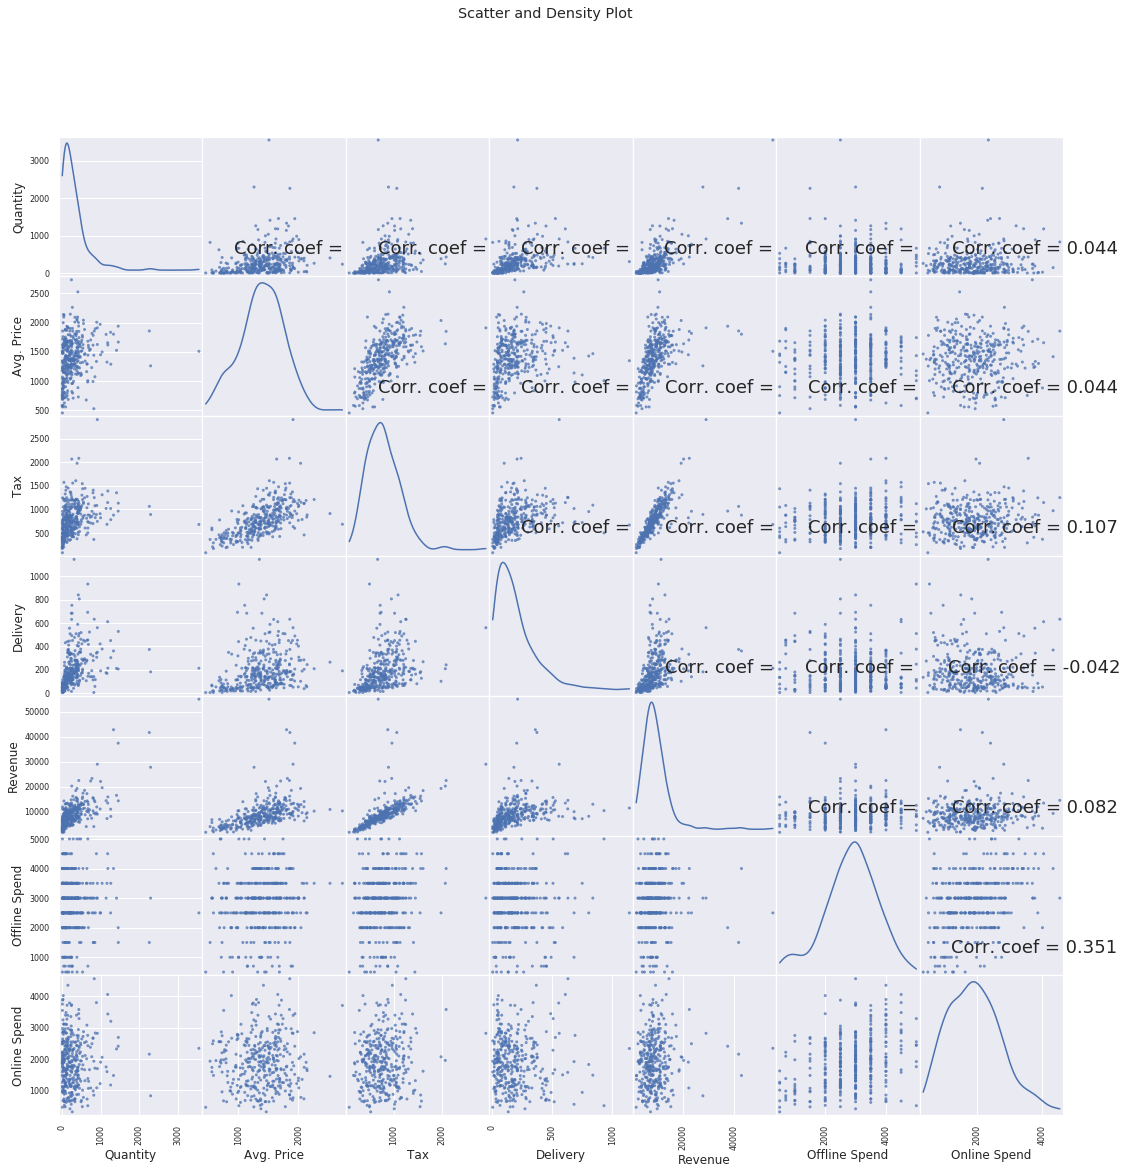

In [0]:
plotScatterMatrix(Online_revenue_report, 18, 18)

In [0]:
# Retail Data
Retail = pd.read_csv(googlepath+'/Retail.csv', delimiter=',')
Retail.dataframeName = 'Retail.csv'
nRow, nCol = Retail.shape
print(f'There are {nRow} rows and {nCol} columns')
Retail

There are 181247 rows and 4 columns


,InvoiceNo,InvoiceDate,StockCode,Quantity
0,536598,2017-01-01,21421,1
1,536598,2017-01-01,21422,2
2,536598,2017-01-01,22178,26
3,536599,2017-01-01,20749,2
4,536599,2017-01-01,21056,2
...,...,...,...,...
181242,580137,2017-12-31,21977,1
181243,580137,2017-12-31,20914,6
181244,580137,2017-12-31,21034,3
181245,580137,2017-12-31,21588,1


In [0]:
Online_revenue_report['Total Spending'] = Online_revenue_report['Offline Spend'] + Online_revenue_report['Online Spend']
Online_revenue_report

,Date,Quantity,Avg. Price,Tax,Delivery,Revenue,Offline Spend,Online Spend,Total Spending
0,2017-01-01,149.0,1116.34,356.35,138.07,5112.21,4500,2424.50,6924.50
1,2017-01-02,104.0,1222.45,786.42,53.16,7831.19,4500,3480.36,7980.36
2,2017-01-03,249.0,1587.63,1255.11,630.07,11076.02,4500,1576.38,6076.38
3,2017-01-04,213.0,1695.15,864.54,132.12,10049.54,4500,2928.55,7428.55
4,2017-01-05,1183.0,1655.56,1144.23,610.51,13404.21,4500,4055.30,8555.30
...,...,...,...,...,...,...,...,...,...
360,2017-12-27,91.0,1325.99,832.05,45.48,8334.89,4000,3396.87,7396.87
361,2017-12-28,25.0,1256.72,694.46,41.19,6845.49,4000,3246.84,7246.84
362,2017-12-29,15.0,1486.65,699.64,54.18,6974.16,4000,2546.58,6546.58
363,2017-12-30,25.0,1314.52,454.77,54.18,5169.61,4000,674.31,4674.31


In [0]:
r=Online_revenue_report.iloc[0:20]

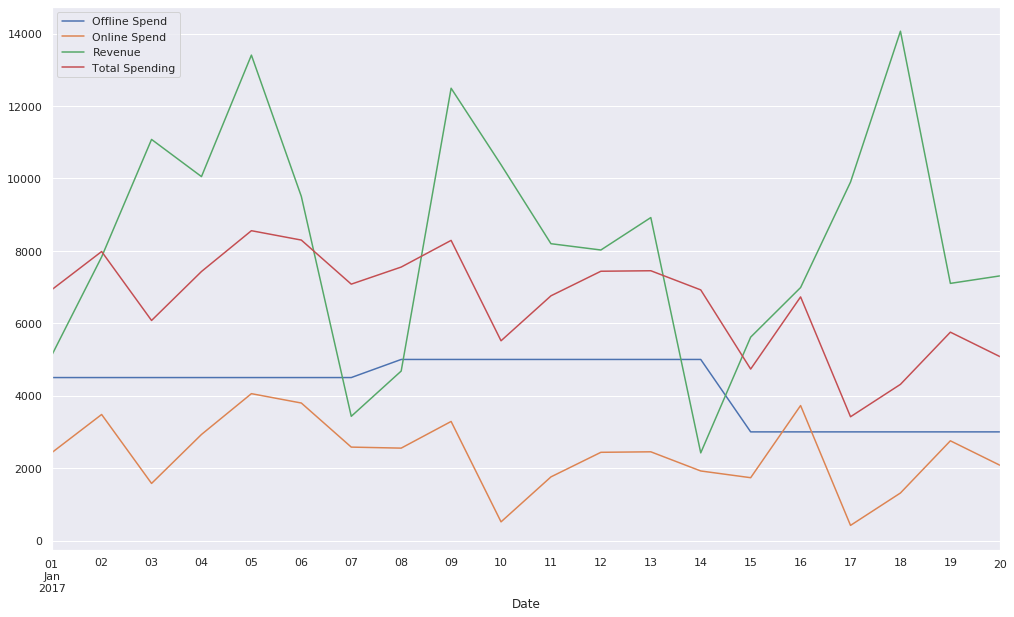

In [0]:
r.plot(x='Date', y=['Offline Spend', 'Online Spend','Revenue','Total Spending'], figsize=(17,10), grid=True)

In [0]:
Online_Keycode["Revenue"] = Online_Keycode.Revenue
Online_Keycode["Year"] = Online_Keycode.Date.dt.year
Online_Keycode["Quarter"] = Online_Keycode.Date.dt.quarter
Online_Keycode["Month"] = Online_Keycode.Date.dt.month
Online_Keycode["Week"] = Online_Keycode.Date.dt.week
Online_Keycode["Weekday"] = Online_Keycode.Date.dt.weekday
Online_Keycode["Day"] = Online_Keycode.Date.dt.day
Online_Keycode["Dayofyear"] = Online_Keycode.Date.dt.dayofyear
Online_Keycode["Date"] = pd.to_datetime(Online_Keycode[['Year', 'Month', 'Day']])

In [0]:
Online_Keycode.columns

Index(['CustomerID', 'Transaction ID', 'Date', 'Product SKU', 'Product',
       'Product Category (Enhanced E-commerce)', 'Quantity', 'Avg. Price',
       'Revenue', 'Tax', 'Delivery', 'StockCode', 'Year', 'Quarter', 'Month',
       'Week', 'Weekday', 'Day', 'Dayofyear'],
      dtype='object')

In [0]:
grouped_features = ["Transaction ID","Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode"]

In [0]:
daily_data = pd.DataFrame(Online_Keycode.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data["Revenue"] = Online_Keycode.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head(100)

,Transaction ID,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,16679,2017-01-01,2017,1,1,52,6,1,1,21068,1.0,149.00
1,16680,2017-01-01,2017,1,1,52,6,1,1,21068,1.0,149.00
2,16681,2017-01-01,2017,1,1,52,6,1,1,22114,1.0,1.99
3,16682,2017-01-01,2017,1,1,52,6,1,1,20956,5.0,954.95
4,16682,2017-01-01,2017,1,1,52,6,1,1,21143,31.0,954.95
...,...,...,...,...,...,...,...,...,...,...,...,...
95,16745,2017-01-02,2017,1,1,1,0,2,2,21056,1.0,119.00
96,16747,2017-01-02,2017,1,1,1,0,2,2,21035,1.0,31.98
97,16747,2017-01-02,2017,1,1,1,0,2,2,21635,1.0,31.98
98,16748,2017-01-02,2017,1,1,1,0,2,2,21068,1.0,149.00


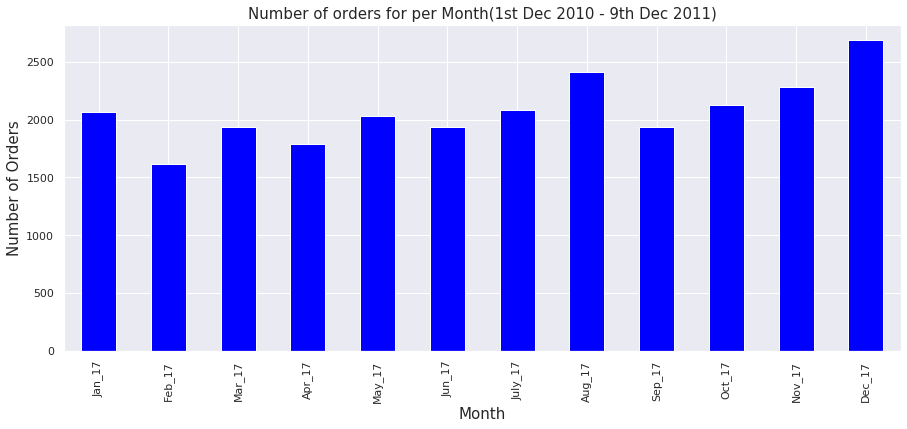

In [0]:
ax=daily_data.groupby('Transaction ID')['Month'].unique().value_counts().sort_index().plot(kind ='bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month(1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Jan_17','Feb_17','Mar_17','Apr_17','May_17','Jun_17','July_17','Aug_17','Sep_17','Oct_17','Nov_17','Dec_17'));

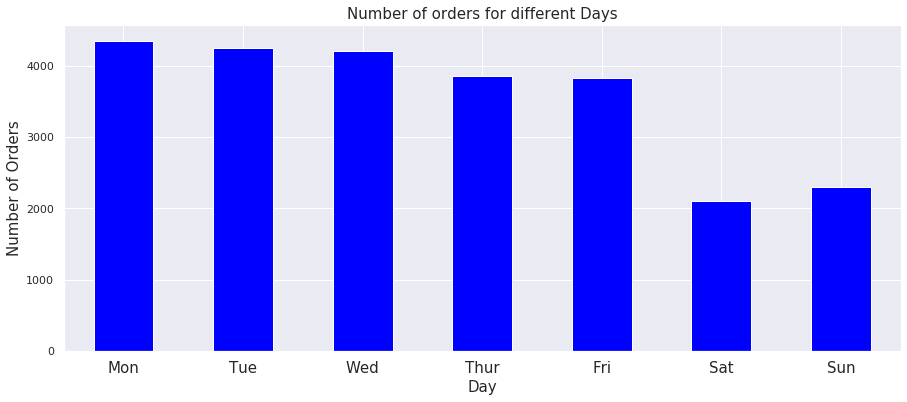

In [0]:
Day_online_sales=daily_data.groupby('Transaction ID')['Weekday'].unique().value_counts().sort_index().plot(kind='bar',color='blue',figsize=(15,6))
Day_online_sales.set_xlabel('Day',fontsize=15)
Day_online_sales.set_ylabel('Number of Orders',fontsize=15)
Day_online_sales.set_title('Number of orders for different Days',fontsize=15)
Day_online_sales.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'),rotation='horizontal',fontsize=15);

In [0]:
Day_online_sales=daily_data.groupby('Transaction ID')['Weekday'].unique().value_counts().sort_index()
Day_online_sales = Day_online_sales.to_frame()
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Day_online_sales['weekdays'] = weekdays
Day_online_sales[['weekdays','Number of Orders']] = Day_online_sales[['weekdays','Weekday']] 
Day_online = Day_online_sales[['weekdays','Number of Orders']] 
Day_online.to_csv('Day_online_sales.csv')
!cp Day_online_sales.csv '/content/drive/My Drive/ADM/Assignment 1'


In [0]:
Day_online

,weekdays,Number of Orders
[0],Monday,4350
[1],Tuesday,4246
[2],Wednesday,4208
[3],Thursday,3849
[4],Friday,3829
[5],Saturday,2111
[6],Sunday,2296


**Lets start cohort analysis**

Cohort analysis in ecommerce means to monitor your customers’ behavior based on common traits they share – the first product they bought, when they became customers, etc. – to find patterns and tailor marketing activities for the group.
                      ![alt text](https://drive.google.com/uc?id=1QN62KQjhhbWouTsncf_Gfvj5_XvLaQWc)

















In [0]:
import datetime as dt
def get_month(x) : return dt.datetime(x.year,x.month,1)
Online_Keycode['InvoiceMonth'] = Online_Keycode['Date'].apply(get_month)
grouping = Online_Keycode.groupby('CustomerID')['InvoiceMonth']
Online_Keycode['CohortMonth'] = grouping.transform('min')
Online_Keycode.tail()

,CustomerID,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,StockCode,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,InvoiceMonth,CohortMonth
51877,13137,17940,2017-01-15,GGOEAAAJ032415,Android Men's Short Sleeve Tri-blend Hero Tee ...,Apparel,4.0,19.59,831.64,56.58,6.5,21946,2017,1,1,2,6,15,15,2017-01-01,2017-01-01
51878,16686,17251,2017-01-06,GGOEAAAJ032415,Android Men's Short Sleeve Tri-blend Hero Tee ...,Apparel,2.0,15.67,183.88,16.19,6.5,21946,2017,1,1,1,4,6,6,2017-01-01,2017-01-01
51879,14329,27702,2017-05-10,GGOEAAEJ033416,Android Men's Long Sleeve Badge Crew Tee Heather,Apparel,1.0,19.59,179.66,16.30,6.0,20666,2017,2,5,19,2,10,130,2017-05-01,2017-05-01
51880,17690,27039,2017-05-02,GGOEAAEJ033416,Android Men's Long Sleeve Badge Crew Tee Heather,Apparel,1.0,24.49,64.37,4.94,6.0,20666,2017,2,5,18,1,2,122,2017-05-01,2017-05-01
51881,13001,27015,2017-05-02,GGOEAAEJ033416,Android Men's Long Sleeve Badge Crew Tee Heather,Apparel,1.0,19.59,92.91,8.92,6.0,20666,2017,2,5,18,1,2,122,2017-05-01,2017-03-01


In [0]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(Online_Keycode,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(Online_Keycode,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

Online_Keycode['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [0]:
Online_Keycode

,CustomerID,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,StockCode,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,InvoiceMonth,CohortMonth,CohortIndex
0,17850,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99,21421,2017,4,12,52,6,31,365,2017-12-01,2017-12-01,1
1,17850,48491,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2.0,80.52,376.00,0.00,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-12-01,1
2,12583,48475,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,1022.00,92.58,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-06-01,7
3,12583,48468,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2.0,80.52,158.00,14.59,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-06-01,7
4,12583,48466,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,3.0,80.52,237.00,21.61,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-06-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51877,13137,17940,2017-01-15,GGOEAAAJ032415,Android Men's Short Sleeve Tri-blend Hero Tee ...,Apparel,4.0,19.59,831.64,56.58,6.50,21946,2017,1,1,2,6,15,15,2017-01-01,2017-01-01,1
51878,16686,17251,2017-01-06,GGOEAAAJ032415,Android Men's Short Sleeve Tri-blend Hero Tee ...,Apparel,2.0,15.67,183.88,16.19,6.50,21946,2017,1,1,1,4,6,6,2017-01-01,2017-01-01,1
51879,14329,27702,2017-05-10,GGOEAAEJ033416,Android Men's Long Sleeve Badge Crew Tee Heather,Apparel,1.0,19.59,179.66,16.30,6.00,20666,2017,2,5,19,2,10,130,2017-05-01,2017-05-01,1
51880,17690,27039,2017-05-02,GGOEAAEJ033416,Android Men's Long Sleeve Badge Crew Tee Heather,Apparel,1.0,24.49,64.37,4.94,6.00,20666,2017,2,5,18,1,2,122,2017-05-01,2017-05-01,1


In [0]:
#Count monthly active customers from each cohort
grouping = Online_Keycode.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,219.0,25.0,30.0,37.0,41.0,32.0,46.0,44.0,25.0,28.0,31.0,35.0
2017-02-01,139.0,21.0,13.0,23.0,18.0,21.0,30.0,16.0,15.0,9.0,12.0,NaN
2017-03-01,167.0,13.0,15.0,17.0,27.0,29.0,16.0,19.0,7.0,12.0,NaN,NaN
2017-04-01,134.0,23.0,10.0,18.0,20.0,16.0,11.0,11.0,10.0,NaN,NaN,NaN
2017-05-01,138.0,14.0,15.0,26.0,11.0,21.0,11.0,11.0,NaN,NaN,NaN,NaN
2017-06-01,95.0,12.0,10.0,10.0,8.0,8.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,125.0,21.0,17.0,15.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,153.0,18.0,16.0,7.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,82.0,2.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
cohort_counts.to_csv('cohort_counts.csv')
!cp cohort_counts.csv '/content/drive/My Drive/ADM/Assignment 1'

Retention Rate table

In [0]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,11.4,13.7,16.9,18.7,14.6,21.0,20.1,11.4,12.8,14.2,16.0
2017-02-01,100.0,15.1,9.4,16.5,12.9,15.1,21.6,11.5,10.8,6.5,8.6,NaN
2017-03-01,100.0,7.8,9.0,10.2,16.2,17.4,9.6,11.4,4.2,7.2,NaN,NaN
2017-04-01,100.0,17.2,7.5,13.4,14.9,11.9,8.2,8.2,7.5,NaN,NaN,NaN
2017-05-01,100.0,10.1,10.9,18.8,8.0,15.2,8.0,8.0,NaN,NaN,NaN,NaN
2017-06-01,100.0,12.6,10.5,10.5,8.4,8.4,11.6,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,16.8,13.6,12.0,7.2,9.6,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,11.8,10.5,4.6,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,2.4,3.7,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


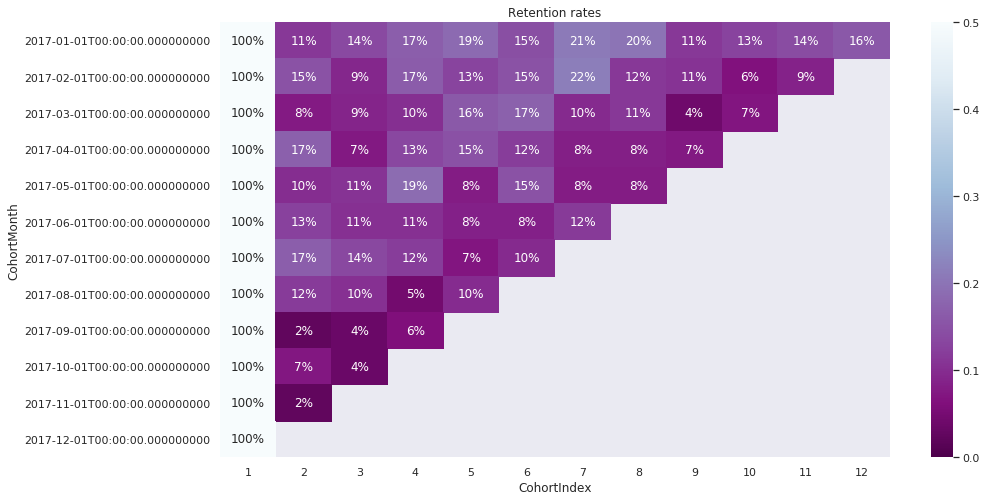

In [0]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

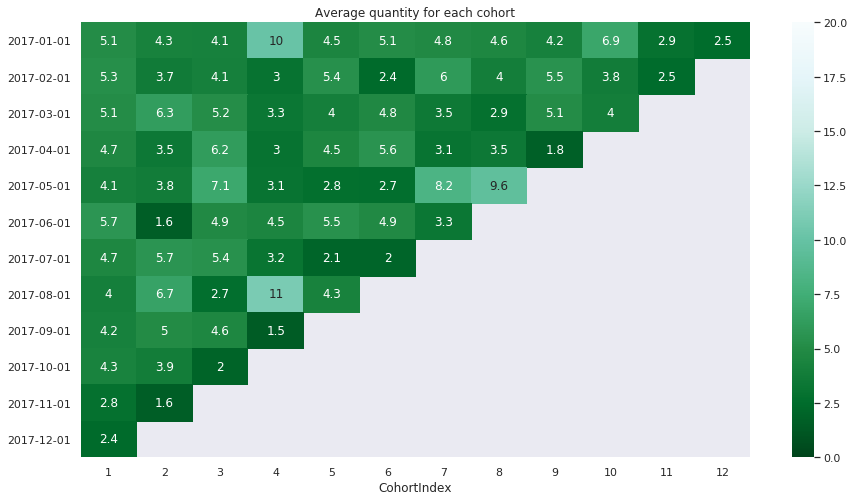

In [0]:
grouping = Online_Keycode.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()

Recency, Frequency and Monetary Value calculation


What is RFM?


*   RFM is an acronym of recency, frequency and monetary. Recency is about when was the last order of a customer. It means the number of days since a customer made the last purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.
*   Frequency is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the more engaged the customers are. Could we say them as our VIP? Not necessary. Cause we also have to think about how much they actually paid for each purchase, which means monetary value.


*   Monetary is the total amount of money a customer spent in that given period. Therefore big spenders will be differentiated with other customers such as MVP or VIP.

![alt text](https://drive.google.com/uc?id=1WRj73gIHM0xIJ3KZwFl4qa8nhysD66yg)











In [0]:
Online_Keycode['Date_Age']=Online_Keycode['Date']

In [0]:
future_date = Online_Keycode['Date'].max() + dt.timedelta(days=1)
future_date

Timestamp('2018-01-01 00:00:00')

Calculate RFM metrics

In [0]:
rfm = Online_Keycode.groupby(['CustomerID']).agg({'Date': lambda x : (future_date - x.max()).days,
                                      'Transaction ID':'count','Revenue': 'sum','Date_Age': lambda x : (x.max()-x.min()).days})

 **T** represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.

In [0]:
rfm.rename(columns={'Date':'Recency','Transaction ID':'Frequency','Revenue':'MonetaryValue','Date_Age':'T-Age'}
           ,inplace= True)

rfm.head()

,Recency,Frequency,MonetaryValue,T-Age
CustomerID,,,,
12346,248,2,734.21,0
12347,78,53,10551.39,215
12348,154,23,14727.20,126
12350,340,14,2732.88,0
12356,248,32,7756.50,0


count    1478.000000
mean       35.102842
std        49.579275
min         1.000000
25%        10.000000
50%        20.000000
75%        44.000000
max       693.000000
Name: Frequency, dtype: float64
0.0


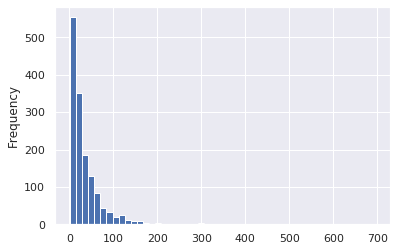

In [0]:
rfm['Frequency'].plot(kind='hist', bins=50)
print(rfm['Frequency'].describe())
print(sum(rfm['Frequency'] == 0)/float(len(rfm)))

In [0]:
Online_Keycode

,CustomerID,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,StockCode,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,InvoiceMonth,CohortMonth,CohortIndex,Date_Age
0,17850,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99,21421,2017,4,12,52,6,31,365,2017-12-01,2017-12-01,1,2017-12-31
1,17850,48491,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2.0,80.52,376.00,0.00,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-12-01,1,2017-12-31
2,12583,48475,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,1022.00,92.58,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-06-01,7,2017-12-31
3,12583,48468,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2.0,80.52,158.00,14.59,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-06-01,7,2017-12-31
4,12583,48466,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,3.0,80.52,237.00,21.61,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-06-01,7,2017-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51877,13137,17940,2017-01-15,GGOEAAAJ032415,Android Men's Short Sleeve Tri-blend Hero Tee ...,Apparel,4.0,19.59,831.64,56.58,6.50,21946,2017,1,1,2,6,15,15,2017-01-01,2017-01-01,1,2017-01-15
51878,16686,17251,2017-01-06,GGOEAAAJ032415,Android Men's Short Sleeve Tri-blend Hero Tee ...,Apparel,2.0,15.67,183.88,16.19,6.50,21946,2017,1,1,1,4,6,6,2017-01-01,2017-01-01,1,2017-01-06
51879,14329,27702,2017-05-10,GGOEAAEJ033416,Android Men's Long Sleeve Badge Crew Tee Heather,Apparel,1.0,19.59,179.66,16.30,6.00,20666,2017,2,5,19,2,10,130,2017-05-01,2017-05-01,1,2017-05-10
51880,17690,27039,2017-05-02,GGOEAAEJ033416,Android Men's Long Sleeve Badge Crew Tee Heather,Apparel,1.0,24.49,64.37,4.94,6.00,20666,2017,2,5,18,1,2,122,2017-05-01,2017-05-01,1,2017-05-02


In [0]:
Transaction_count = Online_Keycode.groupby(['CustomerID'])['Transaction ID'].count()
Revenue_per_customer = Online_Keycode.groupby(['CustomerID'])['Revenue'].sum()
Transaction_count = Transaction_count.to_frame()
Revenue_per_customer = Revenue_per_customer.to_frame()
Trans_Revenue= pd.merge(Transaction_count,Revenue_per_customer , how='inner', on = 'CustomerID')



In [0]:
Transaction_Revenue=Trans_Revenue.rename(columns={"Transaction ID": "Transaction", "Revenue": "Revenue"}, errors="raise")
Transaction_Revenue

,Transaction,Revenue
CustomerID,,
12346,2,734.21
12347,53,10551.39
12348,23,14727.20
12350,14,2732.88
12356,32,7756.50
...,...,...
18256,4,634.32
18259,7,877.90
18260,40,5488.69


In [0]:
Transaction_Revenue['avg_order_value']=Transaction_Revenue['Revenue']/Transaction_Revenue['Transaction']
Transaction_Revenue

,Transaction,Revenue,avg_order_value
CustomerID,,,
12346,2,734.21,367.105000
12347,53,10551.39,199.082830
12348,23,14727.20,640.313043
12350,14,2732.88,195.205714
12356,32,7756.50,242.390625
...,...,...,...
18256,4,634.32,158.580000
18259,7,877.90,125.414286
18260,40,5488.69,137.217250


**Calculate Profit Margin**
Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.

In [0]:
Transaction_Revenue['profit_margin']=Transaction_Revenue['Transaction']*0.05
Transaction_Revenue

,Transaction,Revenue,avg_order_value,profit_margin
CustomerID,,,,
12346,2,734.21,367.105000,0.10
12347,53,10551.39,199.082830,2.65
12348,23,14727.20,640.313043,1.15
12350,14,2732.88,195.205714,0.70
12356,32,7756.50,242.390625,1.60
...,...,...,...,...
18256,4,634.32,158.580000,0.20
18259,7,877.90,125.414286,0.35
18260,40,5488.69,137.217250,2.00


**Calculate Purchase Frequency**

In [0]:
purchase_frequency=sum(Transaction_Revenue['Transaction'])/Transaction_Revenue.shape[0]
purchase_frequency

35.10284167794317

**Calculate Repeat Rate and Churn Rate**

In [0]:
repeat_rate=Transaction_Revenue[Transaction_Revenue.Transaction > 1].shape[0]/Transaction_Revenue.shape[0]
repeat_rate

0.9546684709066305

In [0]:
#Churn Rate
churn_rate=1-repeat_rate
churn_rate

0.04533152909336946

**Calcualte Customer Lifetime Value**

In [0]:
# Customer Value
Transaction_Revenue['CLV']=(Transaction_Revenue['avg_order_value']*purchase_frequency)/churn_rate
Transaction_Revenue

,Transaction,Revenue,avg_order_value,profit_margin,CLV
CustomerID,,,,,
12346,2,734.21,367.105000,0.10,284270.770299
12347,53,10551.39,199.082830,2.65,154161.423819
12348,23,14727.20,640.313043,1.15,495831.661518
12350,14,2732.88,195.205714,0.70,151159.147292
12356,32,7756.50,242.390625,1.60,187697.170243
...,...,...,...,...,...
18256,4,634.32,158.580000,0.20,122797.724776
18259,7,877.90,125.414286,0.35,97115.581663
18260,40,5488.69,137.217250,2.00,106255.303948


In [0]:
#Customer Lifetime Value
Transaction_Revenue['cust_lifetime_value']=Transaction_Revenue['CLV']*Transaction_Revenue['profit_margin']
Transaction_Revenue

,Transaction,Revenue,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,
12346,2,734.21,367.105000,0.10,284270.770299,2.842708e+04
12347,53,10551.39,199.082830,2.65,154161.423819,4.085278e+05
12348,23,14727.20,640.313043,1.15,495831.661518,5.702064e+05
12350,14,2732.88,195.205714,0.70,151159.147292,1.058114e+05
12356,32,7756.50,242.390625,1.60,187697.170243,3.003155e+05
...,...,...,...,...,...,...
18256,4,634.32,158.580000,0.20,122797.724776,2.455954e+04
18259,7,877.90,125.414286,0.35,97115.581663,3.399045e+04
18260,40,5488.69,137.217250,2.00,106255.303948,2.125106e+05


In [0]:
pip install lifetimes

     |████████████████████████████████| 583kB 7.0MB/s 


In [0]:
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,MonetaryValue,T-Age,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,
12346,248,2,734.21,0,1,1,1,111,3.0
12347,78,53,10551.39,215,3,4,4,344,11.0
12348,154,23,14727.20,126,2,3,4,234,9.0
12350,340,14,2732.88,0,1,2,2,122,5.0
12356,248,32,7756.50,0,1,3,3,133,7.0


In [0]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Gold'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Silver'
    else:  
        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            221.2       7.2        1208.3   407
Gold               69.9      82.2       23874.3   386
Silver            150.4      25.1        6221.1   685

In [0]:
rfm

,Recency,Frequency,MonetaryValue,T-Age,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,,
12346,248,2,734.21,0,1,1,1,111,3.0,Bronze
12347,78,53,10551.39,215,3,4,4,344,11.0,Gold
12348,154,23,14727.20,126,2,3,4,234,9.0,Silver
12350,340,14,2732.88,0,1,2,2,122,5.0,Bronze
12356,248,32,7756.50,0,1,3,3,133,7.0,Silver
...,...,...,...,...,...,...,...,...,...,...
18256,161,4,634.32,0,2,1,1,211,4.0,Bronze
18259,89,7,877.90,0,3,1,1,311,5.0,Bronze
18260,154,40,5488.69,113,2,3,3,233,8.0,Silver


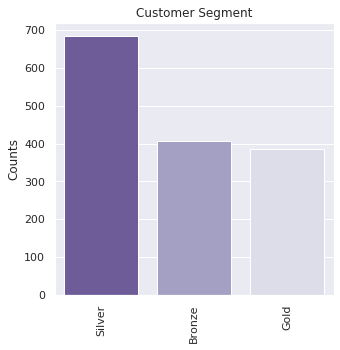

In [0]:
customer_count = rfm['General_Segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(customer_count.index, customer_count.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Customer Segment");
plt.xticks(rotation=90);

In [0]:
rfm['RFM_Score'].value_counts().sort_values(ascending=False)


5.0     188
6.0     185
8.0     178
7.0     163
9.0     159
10.0    153
4.0     127
12.0    121
11.0    112
3.0      92
Name: RFM_Score, dtype: int64

In [0]:
Targetd_customers = pd.merge(Online_Keycode, rfm, how='right', on = 'CustomerID')
Targetd_customers

,CustomerID,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,StockCode,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,InvoiceMonth,CohortMonth,CohortIndex,Date_Age,Recency,Frequency,MonetaryValue,T-Age,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,17850,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99,21421,2017,4,12,52,6,31,365,2017-12-01,2017-12-01,1,2017-12-31,1,297,56566.74,24,4,4,4,444,12.0,Gold
1,17850,48491,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2.0,80.52,376.00,0.00,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-12-01,1,2017-12-31,1,297,56566.74,24,4,4,4,444,12.0,Gold
2,17850,48455,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,3.0,80.52,237.00,19.49,6.50,21421,2017,4,12,52,6,31,365,2017-12-01,2017-12-01,1,2017-12-31,1,297,56566.74,24,4,4,4,444,12.0,Gold
3,17850,48141,2017-12-26,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,80.52,79.00,7.70,6.50,21421,2017,4,12,52,1,26,360,2017-12-01,2017-12-01,1,2017-12-26,1,297,56566.74,24,4,4,4,444,12.0,Gold
4,17850,48139,2017-12-26,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2.0,80.52,656.00,61.31,6.50,21421,2017,4,12,52,1,26,360,2017-12-01,2017-12-01,1,2017-12-26,1,297,56566.74,24,4,4,4,444,12.0,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51877,13104,33418,2017-07-22,GGOEGBFC018799,Electronics Accessory Pouch,Bags,4.0,3.99,23.94,3.33,12.99,22260,2017,3,7,29,5,22,203,2017-07-01,2017-07-01,1,2017-07-22,163,1,23.94,0,2,1,1,211,4.0,Bronze
51878,17560,19185,2017-01-30,GGOEGAAJ032316,Google Men's Short Sleeve Hero Tee Charcoal,Apparel,2.0,19.59,374.74,27.61,6.50,21648,2017,1,1,5,0,30,30,2017-01-01,2017-01-01,1,2017-01-30,336,2,749.48,0,1,1,1,111,3.0,Bronze
51879,17560,19185,2017-01-30,GGOEGAWH061348,Google Onesie Green,Apparel,1.0,24.75,374.74,27.61,6.50,21171,2017,1,1,5,0,30,30,2017-01-01,2017-01-01,1,2017-01-30,336,2,749.48,0,1,1,1,111,3.0,Bronze
51880,16333,18664,2017-01-23,GGOEYDHJ019399,24 oz YouTube Sergeant Stripe Bottle,Drinkware,1.0,8.24,26.98,2.60,6.50,21661,2017,1,1,4,0,23,23,2017-01-01,2017-01-01,1,2017-01-23,343,1,26.98,0,1,1,1,111,3.0,Bronze


In [0]:
Targetd_customers=Targetd_customers[['CustomerID','Transaction ID','Quantity','Product Category (Enhanced E-commerce)','Product','Date','Revenue','Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M',
       'RFM_Segment', 'RFM_Score','General_Segment']]

In [0]:
Targeted_customers=Targetd_customers[Targetd_customers['RFM_Score'] != 12]
Targeted_customers

,CustomerID,Transaction ID,Quantity,Product Category (Enhanced E-commerce),Product,Date,Revenue,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
297,12583,48475,4.0,Nest-USA,Nest® Protect Smoke + CO White Battery Alarm-USA,2017-12-31,1022.00,1,42,8692.07,4,3,3,433,10.0,Gold
298,12583,48468,2.0,Nest-USA,Nest® Protect Smoke + CO White Battery Alarm-USA,2017-12-31,158.00,1,42,8692.07,4,3,3,433,10.0,Gold
299,12583,48466,3.0,Nest-USA,Nest® Protect Smoke + CO White Battery Alarm-USA,2017-12-31,237.00,1,42,8692.07,4,3,3,433,10.0,Gold
300,12583,48464,1.0,Nest-USA,Nest® Protect Smoke + CO White Battery Alarm-USA,2017-12-31,79.00,1,42,8692.07,4,3,3,433,10.0,Gold
301,12583,48467,5.0,Nest-USA,Nest® Protect Smoke + CO White Wired Alarm-USA,2017-12-31,544.00,1,42,8692.07,4,3,3,433,10.0,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51877,13104,33418,4.0,Bags,Electronics Accessory Pouch,2017-07-22,23.94,163,1,23.94,2,1,1,211,4.0,Bronze
51878,17560,19185,2.0,Apparel,Google Men's Short Sleeve Hero Tee Charcoal,2017-01-30,374.74,336,2,749.48,1,1,1,111,3.0,Bronze
51879,17560,19185,1.0,Apparel,Google Onesie Green,2017-01-30,374.74,336,2,749.48,1,1,1,111,3.0,Bronze
51880,16333,18664,1.0,Drinkware,24 oz YouTube Sergeant Stripe Bottle,2017-01-23,26.98,343,1,26.98,1,1,1,111,3.0,Bronze


In [0]:
d1=Targeted_customers.groupby(['CustomerID', 'Product Category (Enhanced E-commerce)'])['Quantity'].count().sort_values(ascending=False)
d1

CustomerID  Product Category (Enhanced E-commerce)
14646       Apparel                                   124
14298       Apparel                                    89
17337       Nest-USA                                   87
14505       Apparel                                    87
17611       Apparel                                    76
                                                     ... 
16315       Fun                                         1
14049       Android                                     1
16315       Lifestyle                                   1
16316       Bags                                        1
12346       Apparel                                     1
Name: Quantity, Length: 7617, dtype: int64

In [0]:
d2=d1.to_frame().reset_index()
d2

,CustomerID,Product Category (Enhanced E-commerce),Quantity
0,14646,Apparel,124
1,14298,Apparel,89
2,17337,Nest-USA,87
3,14505,Apparel,87
4,17611,Apparel,76
...,...,...,...
7612,16315,Fun,1
7613,14049,Android,1
7614,16315,Lifestyle,1
7615,16316,Bags,1


In [0]:
 d3=d2.drop_duplicates(subset=None, keep='first', inplace=False)

In [0]:
d3

,CustomerID,Product Category (Enhanced E-commerce),Quantity
0,14646,Apparel,124
1,14298,Apparel,89
2,17337,Nest-USA,87
3,14505,Apparel,87
4,17611,Apparel,76
...,...,...,...
7612,16315,Fun,1
7613,14049,Android,1
7614,16315,Lifestyle,1
7615,16316,Bags,1


In [0]:
d3.columns

Index(['CustomerID', 'Product Category (Enhanced E-commerce)', 'Quantity'], dtype='object')

In [0]:
d4=Targetd_customers[['CustomerID', 'General_Segment']].drop_duplicates(subset=None, keep='first', inplace=False)
d4

,CustomerID,General_Segment
0,17850,Gold
297,12583,Gold
339,15100,Silver
345,15291,Gold
379,14688,Gold
...,...,...
51876,16716,Bronze
51877,13104,Bronze
51878,17560,Bronze
51880,16333,Bronze


In [0]:
d5 = pd.merge(d3, d4, how='inner', on = 'CustomerID')


In [0]:
d5.drop_duplicates(subset='CustomerID', keep='first', inplace=True)
d5

,CustomerID,Product Category (Enhanced E-commerce),Quantity,General_Segment
0,14646,Apparel,124,Gold
14,14298,Apparel,89,Gold
27,17337,Nest-USA,87,Silver
38,14505,Apparel,87,Gold
50,17611,Apparel,76,Gold
...,...,...,...,...
7609,16500,Apparel,1,Bronze
7610,16262,Bags,1,Bronze
7613,16279,Bags,1,Bronze
7615,14090,Nest-USA,1,Bronze


In [0]:
Coupons = pd.read_csv(googlepath+'/COUPON.csv', delimiter=',')
Coupons.dataframeName = 'Coupons.csv'
nRow, nCol = Coupons.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 51 rows and 3 columns


In [0]:
Coupons

,Product Category,Coupon Code,Discount %
0,Apparel,SALE10,10
1,Apparel,SALE20,20
2,Apparel,SALE30,30
3,Nest-USA,ELEC10,10
4,Nest-USA,ELEC20,20
5,Nest-USA,ELEC30,30
6,Office,OFF10,10
7,Office,OFF20,20
8,Office,OFF30,30
9,Drinkware,EXTRA10,10


In [0]:
def product_coupon_rel(row):
  if row['Discount %'] == 10:
    return row['Product Category '] + '-Gold'
  elif row['Discount %'] == 20:
    return row['Product Category '] + '-Silver'
  else:
    return row['Product Category '] + '-Bronze'

In [0]:
Coupons['Product-Coupon'] = Coupons.apply(lambda row : product_coupon_rel(row), axis=1)
Coupons

,Product Category,Coupon Code,Discount %,Product-Coupon
0,Apparel,SALE10,10,Apparel-Gold
1,Apparel,SALE20,20,Apparel-Silver
2,Apparel,SALE30,30,Apparel-Bronze
3,Nest-USA,ELEC10,10,Nest-USA-Gold
4,Nest-USA,ELEC20,20,Nest-USA-Silver
5,Nest-USA,ELEC30,30,Nest-USA-Bronze
6,Office,OFF10,10,Office-Gold
7,Office,OFF20,20,Office-Silver
8,Office,OFF30,30,Office-Bronze
9,Drinkware,EXTRA10,10,Drinkware-Gold


In [0]:
def return_coupon_for_product(row):
  product_coupon = row['Product Category (Enhanced E-commerce)'] + '-' + row['General_Segment']
  try:
    return Coupons.loc[Coupons['Product-Coupon'] == product_coupon, 'Coupon Code'].to_frame().iat[0, 0]
  except:
    print(row)

In [0]:
d5['Coupon Code'] = d5.apply(lambda row: return_coupon_for_product(row), axis=1)

In [0]:
d5

,CustomerID,Product Category (Enhanced E-commerce),Quantity,General_Segment,Coupon Code
0,14646,Apparel,124,Gold,SALE10
14,14298,Apparel,89,Gold,SALE10
27,17337,Nest-USA,87,Silver,ELEC20
38,14505,Apparel,87,Gold,SALE10
50,17611,Apparel,76,Gold,SALE10
...,...,...,...,...,...
7609,16500,Apparel,1,Bronze,SALE30
7610,16262,Bags,1,Bronze,AIO30
7613,16279,Bags,1,Bronze,AIO30
7615,14090,Nest-USA,1,Bronze,ELEC30


cp: cannot stat 'd5.csv': No such file or directory


In [0]:
coupon_status= ['Clicked','Used','No Response']

In [0]:
d5['Coupon Status'] = np.random.choice(list(coupon_status), len(d5))

In [0]:

d5

,CustomerID,Product Category (Enhanced E-commerce),Quantity,General_Segment,Coupon Code,Coupon Status
0,14646,Apparel,124,Gold,SALE10,No Response
14,14298,Apparel,89,Gold,SALE10,No Response
27,17337,Nest-USA,87,Silver,ELEC20,No Response
38,14505,Apparel,87,Gold,SALE10,Used
50,17611,Apparel,76,Gold,SALE10,Clicked
...,...,...,...,...,...,...
7609,16500,Apparel,1,Bronze,SALE30,Clicked
7610,16262,Bags,1,Bronze,AIO30,Clicked
7613,16279,Bags,1,Bronze,AIO30,Clicked
7615,14090,Nest-USA,1,Bronze,ELEC30,Clicked


In [0]:
d5.to_csv('Persolonized_coupons.csv')
!cp Persolonized_coupons.csv '/content/drive/My Drive/ADM/Assignment 1'